## 1. Introdução
Este estudo tem como objetivo analisar dados de saúde mental e comportamento digital, buscando identificar padrões, relações e fatores de risco associados ao uso de tecnologia, sono, atividade física e sintomas de ansiedade/depressão.

## 2. Importação de Bibliotecas e Dados

## 3. Análise Exploratória dos Dados
- Estatísticas descritivas
- Distribuição das variáveis
- Detecção de valores ausentes e outliers

## 4. Visualizações e Relações Entre Variáveis
- Gráficos de dispersão, histogramas, boxplots
- Heatmap de correlação
- Comparação entre grupos

## 5. Testes Estatísticos e Modelos
- Teste t para comparação de grupos
- Regressão linear para investigar relações entre variáveis

## 6. Interpretação dos Resultados
Nesta seção, cada análise será acompanhada de uma breve interpretação dos achados, destacando os principais insights extraídos dos dados.

## 7. Conclusão
Resumo dos principais resultados e possíveis implicações para a saúde mental e hábitos digitais.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lendo os dataFrames

In [26]:
dfMD = pd.read_csv('../data/raw/mental_health_digital_behavior_data.csv')
dfHL = pd.read_csv('../data/raw/Mental_Health_Lifestyle_Dataset.csv')

In [27]:
dfMD.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [28]:
dfMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [29]:
dfMD.isna().sum()

daily_screen_time_min      0
num_app_switches           0
sleep_hours                0
notification_count         0
social_media_time_min      0
focus_score                0
mood_score                 0
anxiety_level              0
digital_wellbeing_score    0
dtype: int64

# Distribuição das variáveis (histogramas)

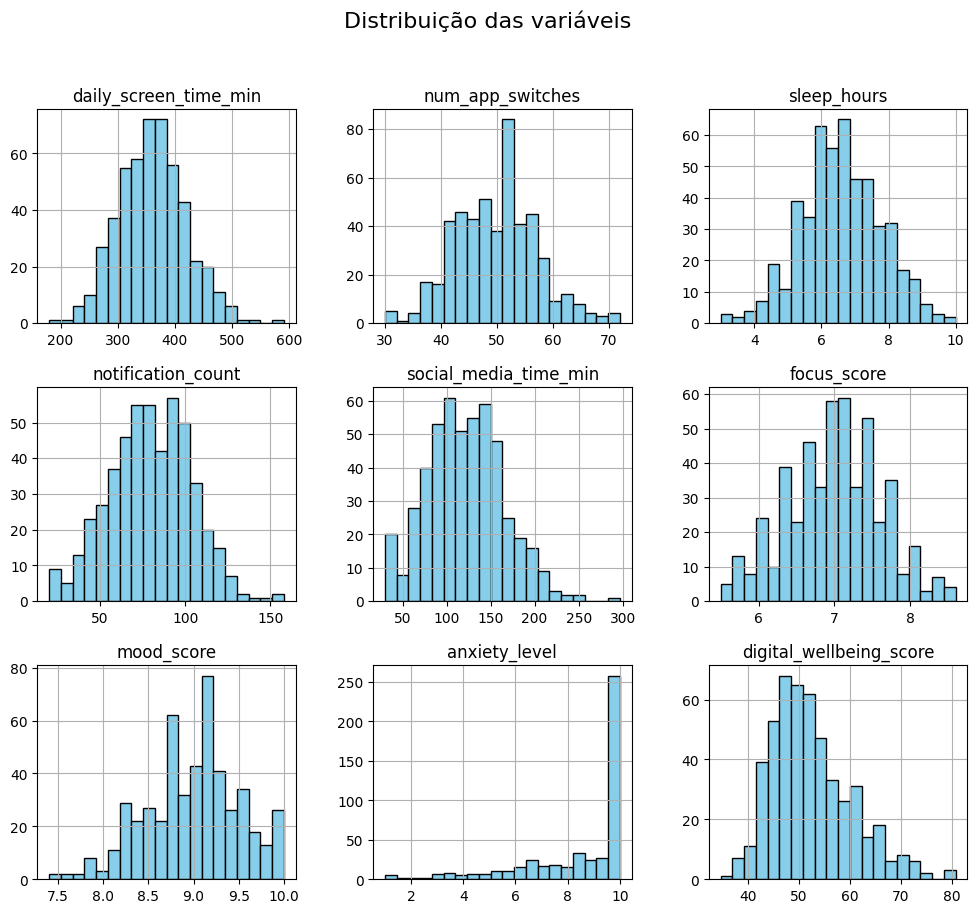

In [30]:
dfMD.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribuição das variáveis", fontsize=16)
plt.show()

# Boxplots para outliers

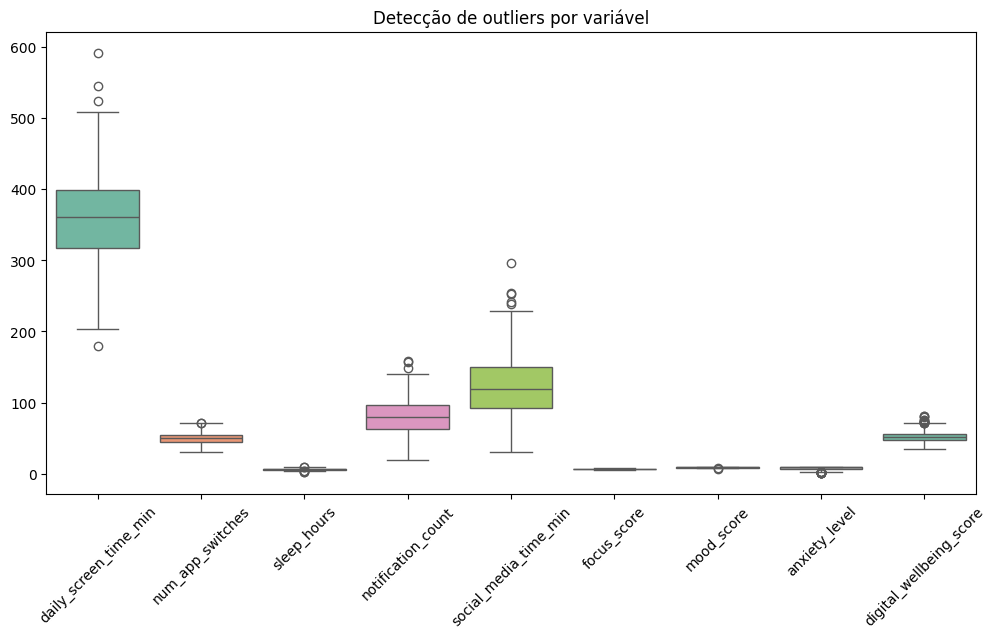

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dfMD, palette="Set2")
plt.title("Detecção de outliers por variável")
plt.xticks(rotation=45)
plt.show()

# Correlação entre variáveis

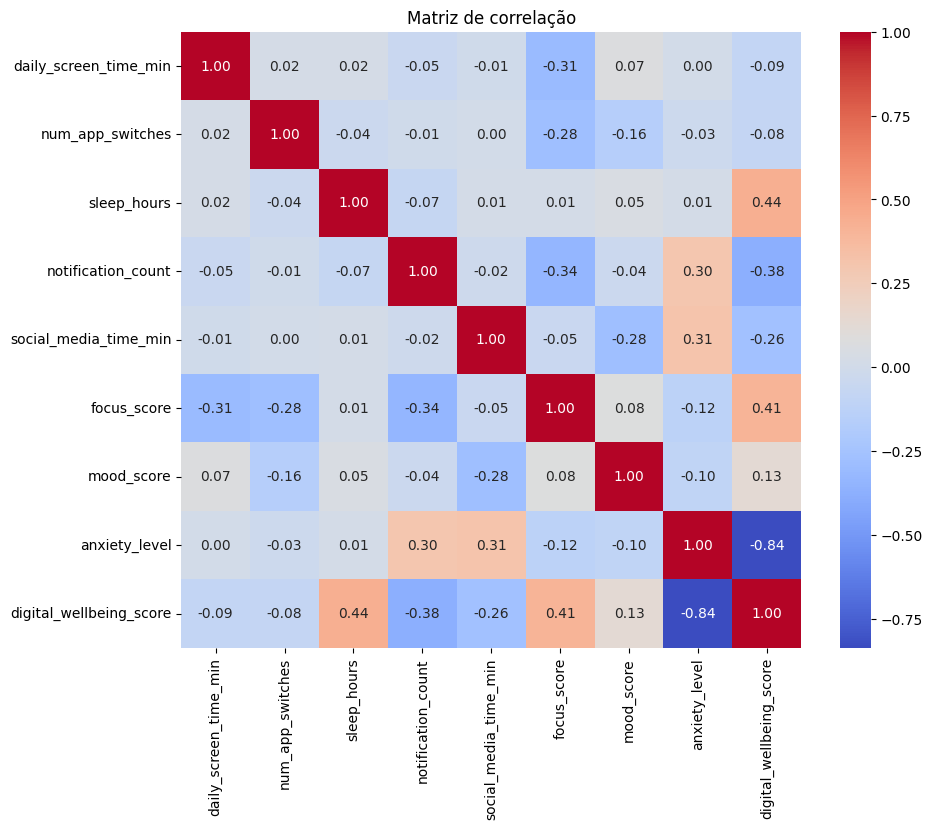

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(dfMD.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")
plt.show()

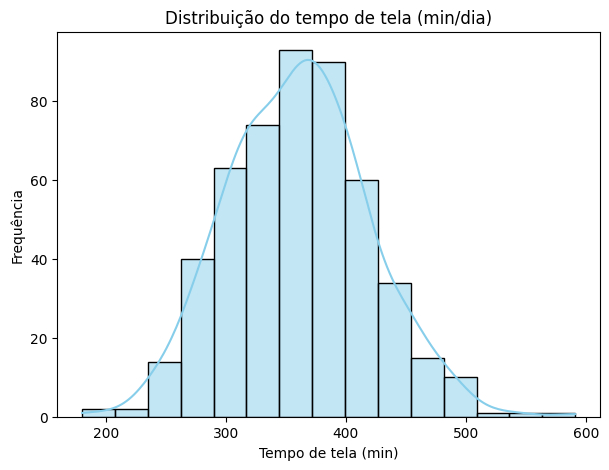

In [33]:
# ---- 1. Histograma do tempo de tela ----
plt.figure(figsize=(7,5))
sns.histplot(dfMD["daily_screen_time_min"], bins=15, kde=True, color="skyblue")
plt.title("Distribuição do tempo de tela (min/dia)")
plt.xlabel("Tempo de tela (min)")
plt.ylabel("Frequência")
plt.show()

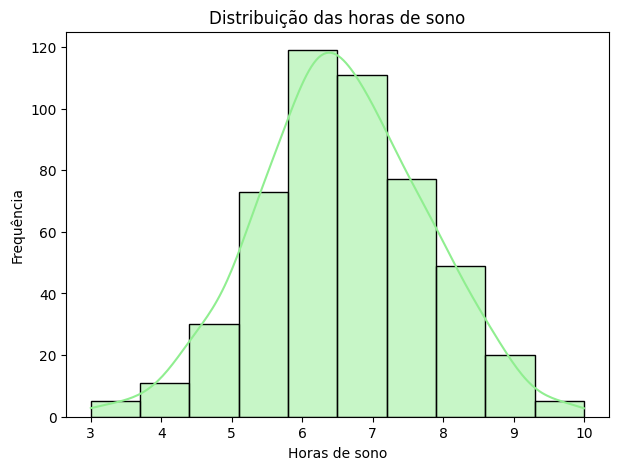

In [34]:
# ---- 2. Histograma do sono ----
plt.figure(figsize=(7,5))
sns.histplot(dfMD["sleep_hours"], bins=10, kde=True, color="lightgreen")
plt.title("Distribuição das horas de sono")
plt.xlabel("Horas de sono")
plt.ylabel("Frequência")
plt.show()

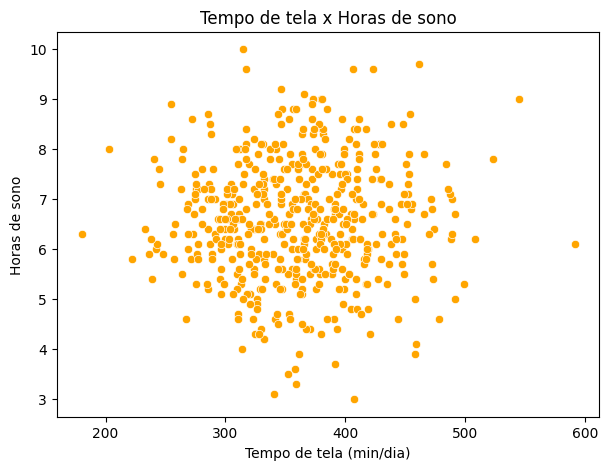

In [35]:
# ---- 3. Relação tempo de tela x sono ----
plt.figure(figsize=(7,5))
sns.scatterplot(x="daily_screen_time_min", y="sleep_hours", data=dfMD, color="orange")
plt.title("Tempo de tela x Horas de sono")
plt.xlabel("Tempo de tela (min/dia)")
plt.ylabel("Horas de sono")
plt.show()

In [36]:
dfHL

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


## Análise Avançada: Clusterização dos Perfis de Usuários
Vamos utilizar o algoritmo KMeans para identificar grupos de usuários com perfis semelhantes, considerando variáveis de comportamento digital e saúde mental. Isso pode revelar padrões ocultos e ajudar a entender diferentes perfis de risco ou proteção.

In [ ]:
# Clusterização dos perfis de usuários (KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleção de variáveis relevantes para o perfil (ajuste conforme as colunas do seu dataset)
variaveis = [col for col in ['daily_screen_time_min', 'sleep_hours', 'anxiety', 'depression', 'physical_activity', 'social_media_time_min'] if col in dfMD.columns]
df_cluster = dfMD[variaveis].dropna()

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Encontrar o número ideal de clusters (cotovelo)
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do cotovelo para escolha de k')
plt.show()

# Ajustar o número de clusters conforme o gráfico do cotovelo (exemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_cluster['cluster'] = clusters

# Visualização dos clusters (usando as duas primeiras variáveis para plotar)
sns.scatterplot(x=variaveis[0], y=variaveis[1], hue='cluster', data=df_cluster, palette='Set1')
plt.title('Clusters de perfis de usuários')
plt.show()